Libraries:

In [22]:
from bikescience import load_trips as tr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set()

Trips:

In [3]:
trips = tr.load_all_trips('../data/boston/bike-trips')
print(len(trips), 'trips')
trips.head()

../boston-ML/data/trips/201204-bluebikes-tripdata.csv
../boston-ML/data/trips/201711-hubway-tripdata.csv
../boston-ML/data/trips/201311-bluebikes-tripdata.csv
../boston-ML/data/trips/201412-hubway-tripdata-.csv
../boston-ML/data/trips/201510-hubway-tripdata.csv
../boston-ML/data/trips/201208-bluebikes-tripdata.csv
../boston-ML/data/trips/201507-hubway-tripdata.csv
../boston-ML/data/trips/201706-hubway-tripdata.csv
../boston-ML/data/trips/201203-bluebikes-tripdata.csv
../boston-ML/data/trips/201508-hubway-tripdata.csv
../boston-ML/data/trips/201402-hubway-tripdata-.csv
../boston-ML/data/trips/201210-bluebikes-tripdata.csv
../boston-ML/data/trips/201401-hubway-tripdata-.csv
../boston-ML/data/trips/201501-hubway-tripdata.csv
../boston-ML/data/trips/201405-hubway-tripdata-.csv
../boston-ML/data/trips/201511-hubway-tripdata.csv
../boston-ML/data/trips/201809-bluebikes-tripdata.csv
../boston-ML/data/trips/201807-bluebikes-tripdata.csv
../boston-ML/data/trips/201309-bluebikes-tripdata.csv
../

tripduration           starttime            stoptime  start station id  \
0           239 2012-04-30 23:59:00 2012-05-01 00:03:00                64   
1           360 2012-04-30 21:34:00 2012-04-30 21:40:00                64   
2           235 2012-04-30 18:31:00 2012-04-30 18:35:00                64   
3           372 2012-04-27 17:37:00 2012-04-27 17:43:00                64   
4           236 2012-04-26 16:42:00 2012-04-26 16:46:00                64   

          start station name  start station latitude  start station longitude  \
0  Congress St at Sleeper St               42.351004                 -71.0493   
1  Congress St at Sleeper St               42.351004                 -71.0493   
2  Congress St at Sleeper St               42.351004                 -71.0493   
3  Congress St at Sleeper St               42.351004                 -71.0493   
4  Congress St at Sleeper St               42.351004                 -71.0493   

   end station id                    end station name  end station latitude  \
0              20  Aquarium T Stop - 200 Atlantic Ave             42.359912   
1              20  Aquarium T Stop - 200 Atlantic Ave             42.359912   
2              20  Aquarium T Stop - 200 Atlantic Ave             42.359912   
3              20  Aquarium T Stop - 200 Atlantic Ave             42.359912   
4              20  Aquarium T Stop - 200 Atlantic Ave             42.359912   

   end station longitude  bikeid    usertype birth year  gender    per_day  \
0              -71.05143  B00535  Subscriber       1969     1.0 2012-04-30   
1              -71.05143  B00085  Subscriber       1969     1.0 2012-04-30   
2              -71.05143  B00523  Subscriber       1969     1.0 2012-04-30   
3              -71.05143  B00445  Subscriber       1969     1.0 2012-04-27   
4              -71.05143  B00413  Subscriber       1969     1.0 2012-04-26   

   hour  week_day  weekend  
0    23         0    False  
1    21         0    False  
2    18         0    False  
3    17         4    False  
4    16         3    False

Counting by month:

In [49]:
trips['per_month'] = trips['starttime'].dt.to_period('m').dt.to_timestamp()
per_month = trips.groupby('per_month').agg({'tripduration': 'count'})
per_month.columns = ['count']
per_month.head()

count
per_month        
2011-07-01   2729
2011-08-01  36233
2011-09-01  40810
2011-10-01  36326
2011-11-01  24876

Filling the "holes":

In [96]:
start = pd.Timestamp(year=2011, month=7, day=1)
end = pd.Timestamp(year=2018, month=9, day=1)

months = []
x = start
while x <= end:
    months.append(x)
    x += pd.DateOffset(months=1)

all_months = pd.DataFrame({'month': months}) \
             .merge(per_month, left_on='month', right_index=True, how='left') \
             .fillna(0)
all_months.set_index('month', inplace=True)
display(all_months.head())
display(all_months[all_months['count'] == 0])

count
month              
2011-07-01   2729.0
2011-08-01  36233.0
2011-09-01  40810.0
2011-10-01  36326.0
2011-11-01  24876.0

count
month            
2011-12-01    0.0
2012-01-01    0.0
2012-02-01    0.0
2012-12-01    0.0
2013-01-01    0.0
2013-02-01    0.0
2013-03-01    0.0

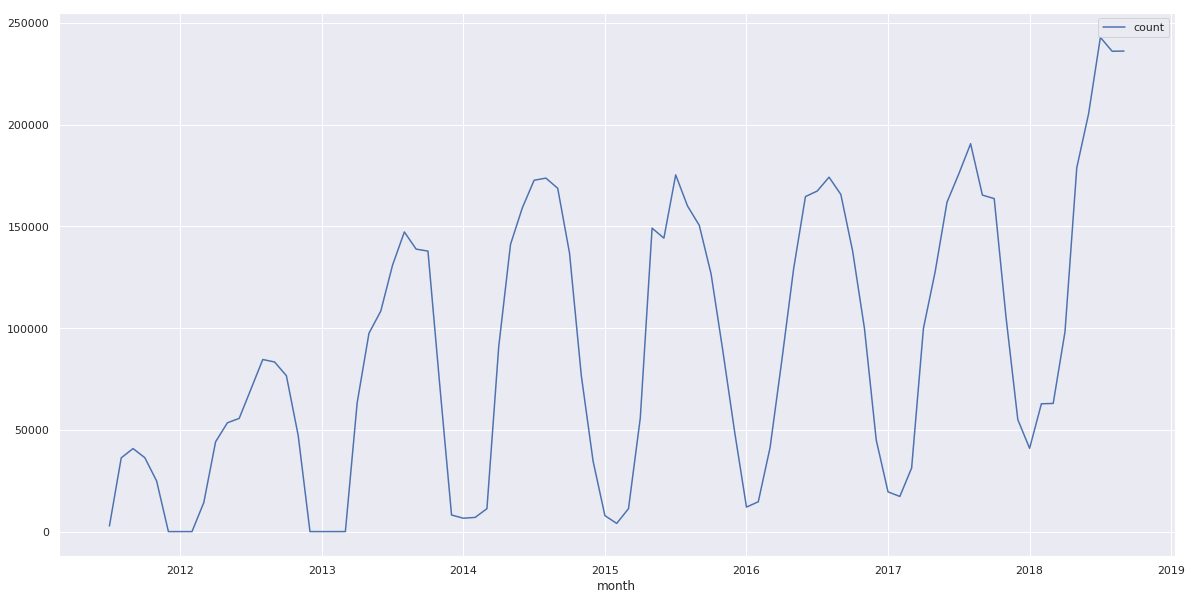

In [136]:
all_months.plot(figsize=(20, 10))

### Time series decomposition

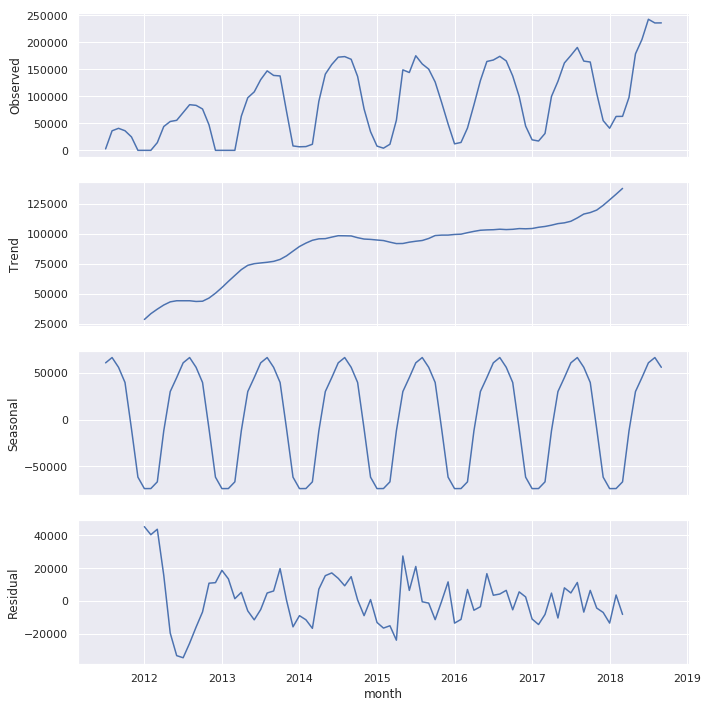

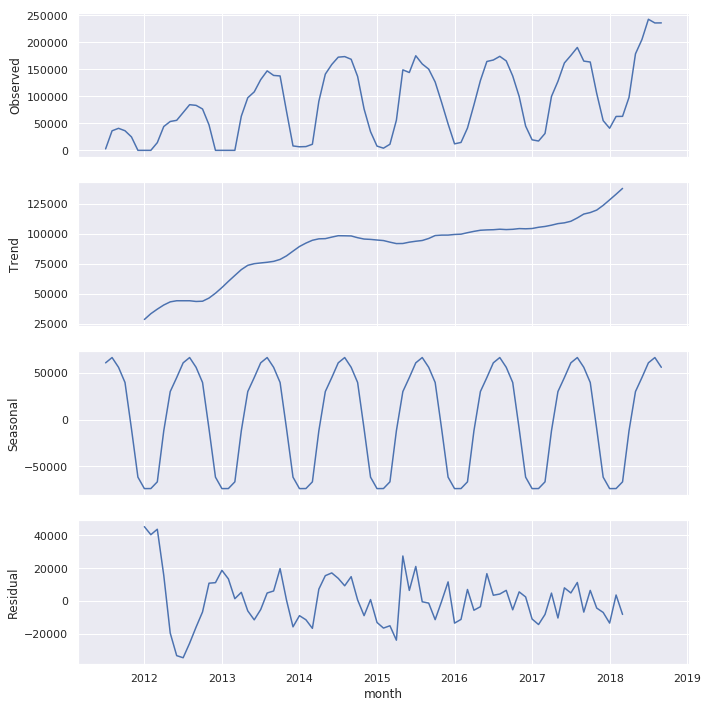

In [134]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
decomposition = sm.tsa.seasonal_decompose(all_months, model='additive')
decomposition.plot()

Trend:

In [133]:
plt.figure(figsize=(20, 10))
plt.plot(all_months.index, all_months['count'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

Rolling average (1 year):

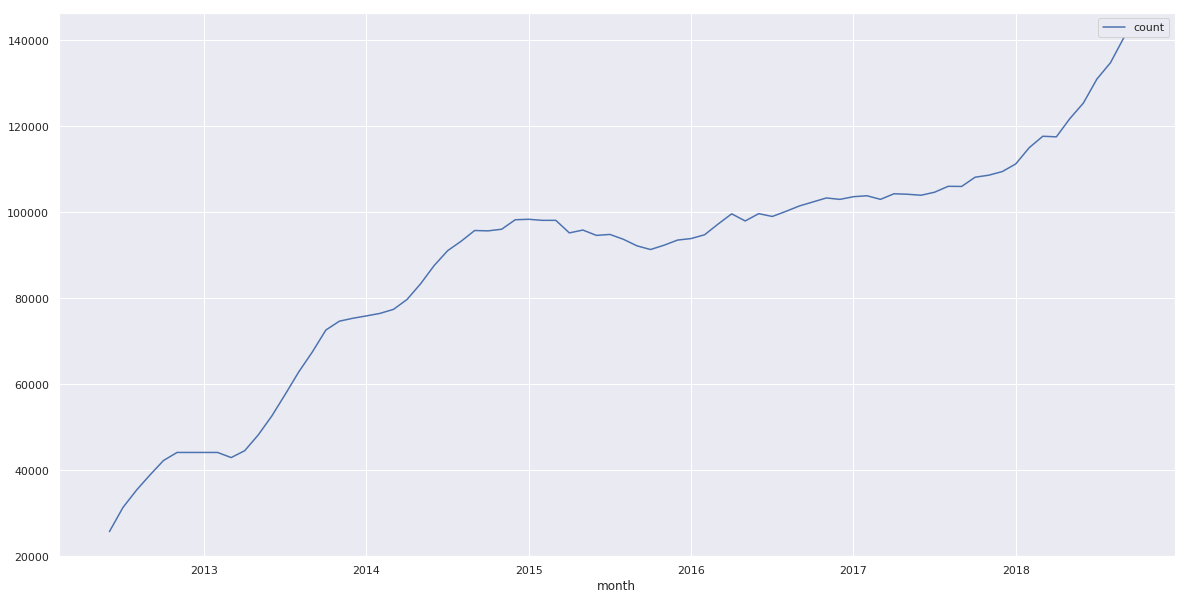

In [137]:
all_months.rolling(12).mean().plot(figsize=(20,10))

First-order differencing:

In [138]:
all_months['count'].diff().plot(figsize=(20, 10))

Autocorrelation:

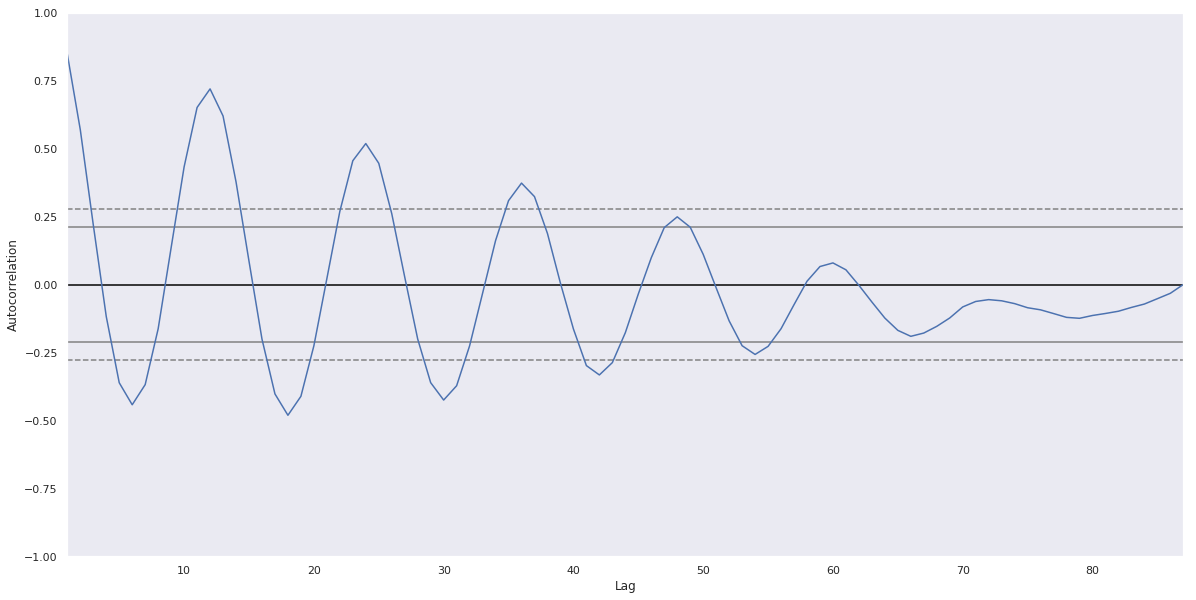

In [140]:
plt.figure(figsize=(20, 10))
pd.plotting.autocorrelation_plot(all_months)